In [276]:
import copy
import time, numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from skimage import draw
from IPython import display
from skimage import morphology
from IPython.display import Video
from skimage.color import rgb2gray
import skimage
from skimage.measure import label, regionprops
import cv2
from skimage import color


In [340]:
img = plt.imread("../Untitled.jpg")

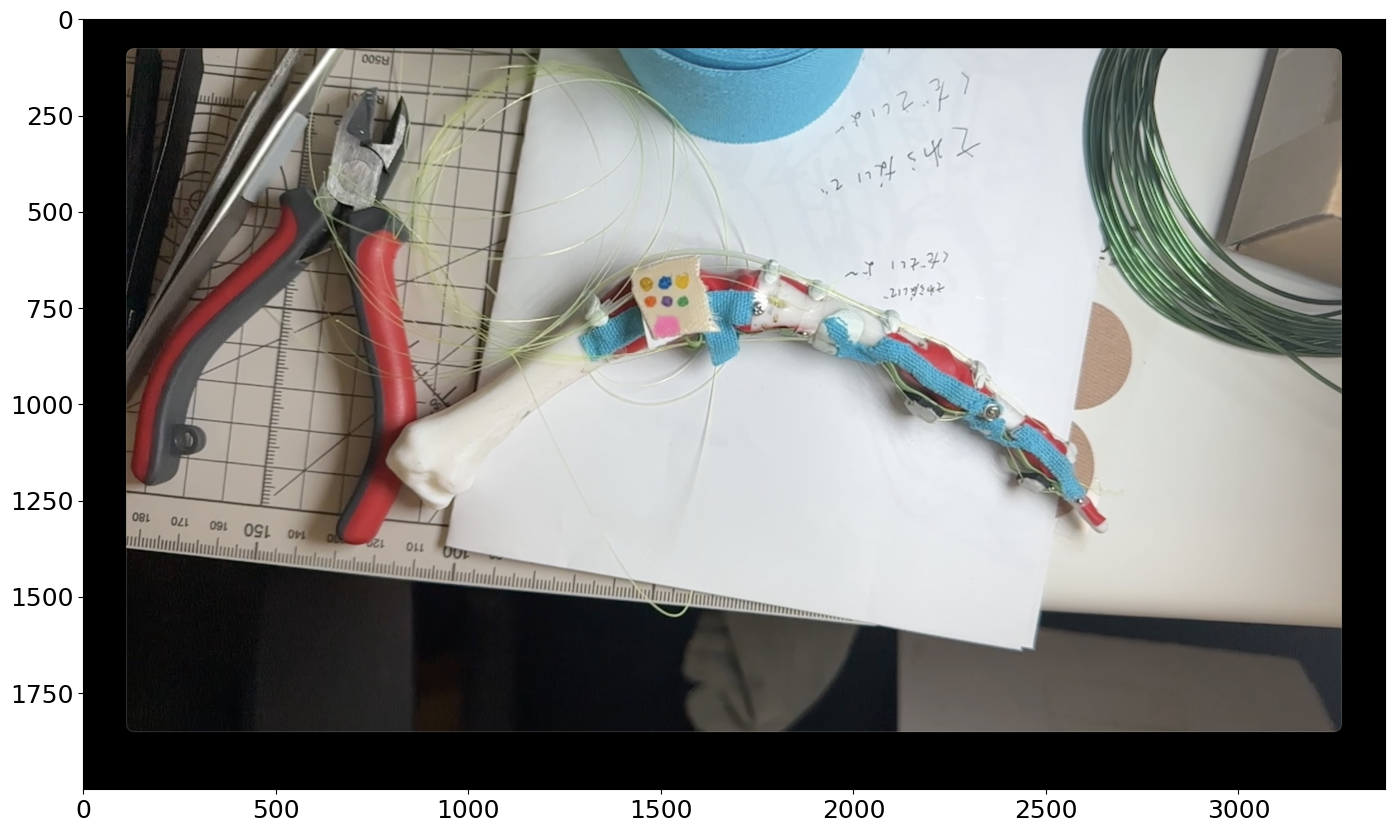

In [341]:
plt.figure(figsize=(20,10))
plt.imshow(img)

In [342]:
frame.shape

(500, 1000, 3)

Text(0.5, 1.0, 'b')

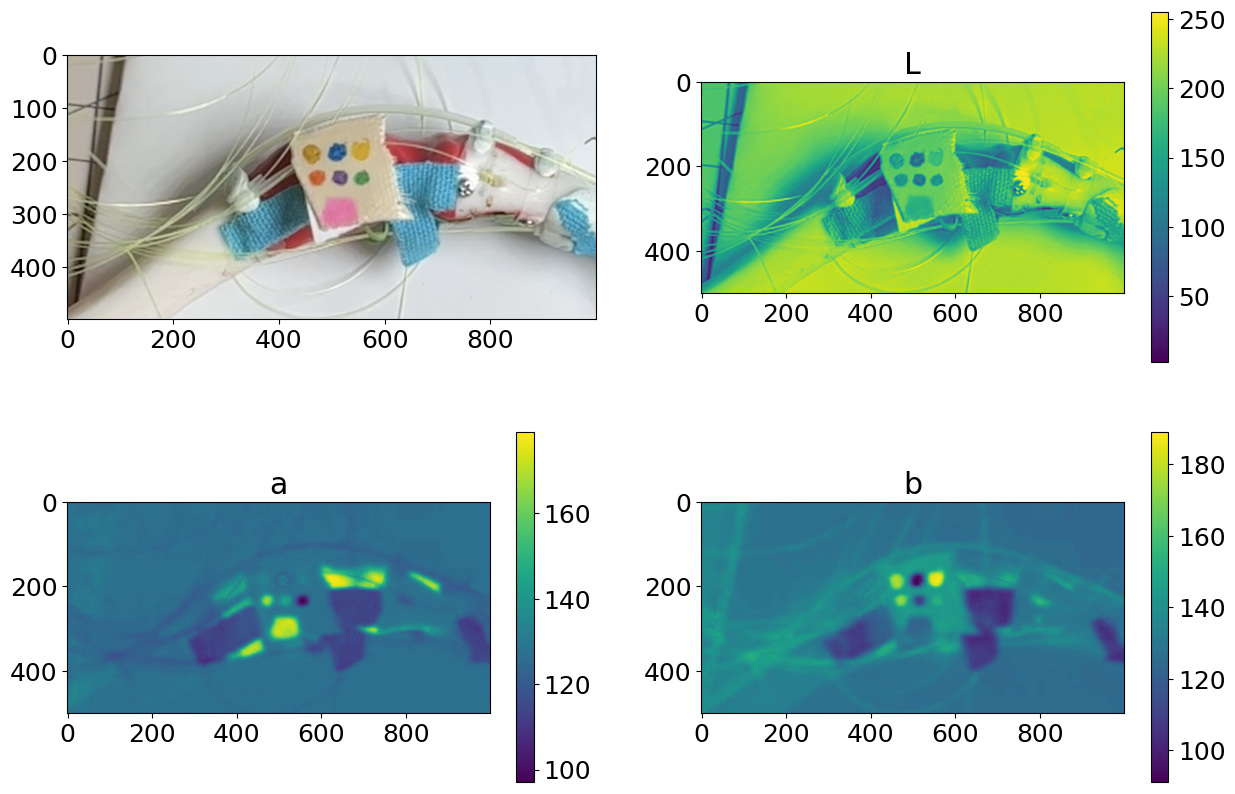

In [343]:
from skimage import color

frame = img[500:1000,1000:2000,:]
frameLab = cv2.cvtColor(frame, cv2.COLOR_RGB2Lab)


plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(frame)
plt.subplot(222)
plt.imshow(frameLab[:,:,0], cmap= 'viridis')
plt.colorbar()
plt.title('L')
plt.subplot(223)
plt.imshow(frameLab[:,:,1], cmap= 'viridis')
plt.colorbar()
plt.title('a')
plt.subplot(224)
plt.imshow(frameLab[:,:,2], cmap= 'viridis')
plt.colorbar()
plt.title('b')

In [344]:

stone_02 = (frameLab[:, :, 1] > 100) & (frameLab[:, :, 1] < 180) & (frameLab[:, :, 2] > 170)
stone_04 = (frameLab[:, :, 1] > 170) & (frameLab[:, :, 2] < 160)

Text(0.5, 1.0, 'L')

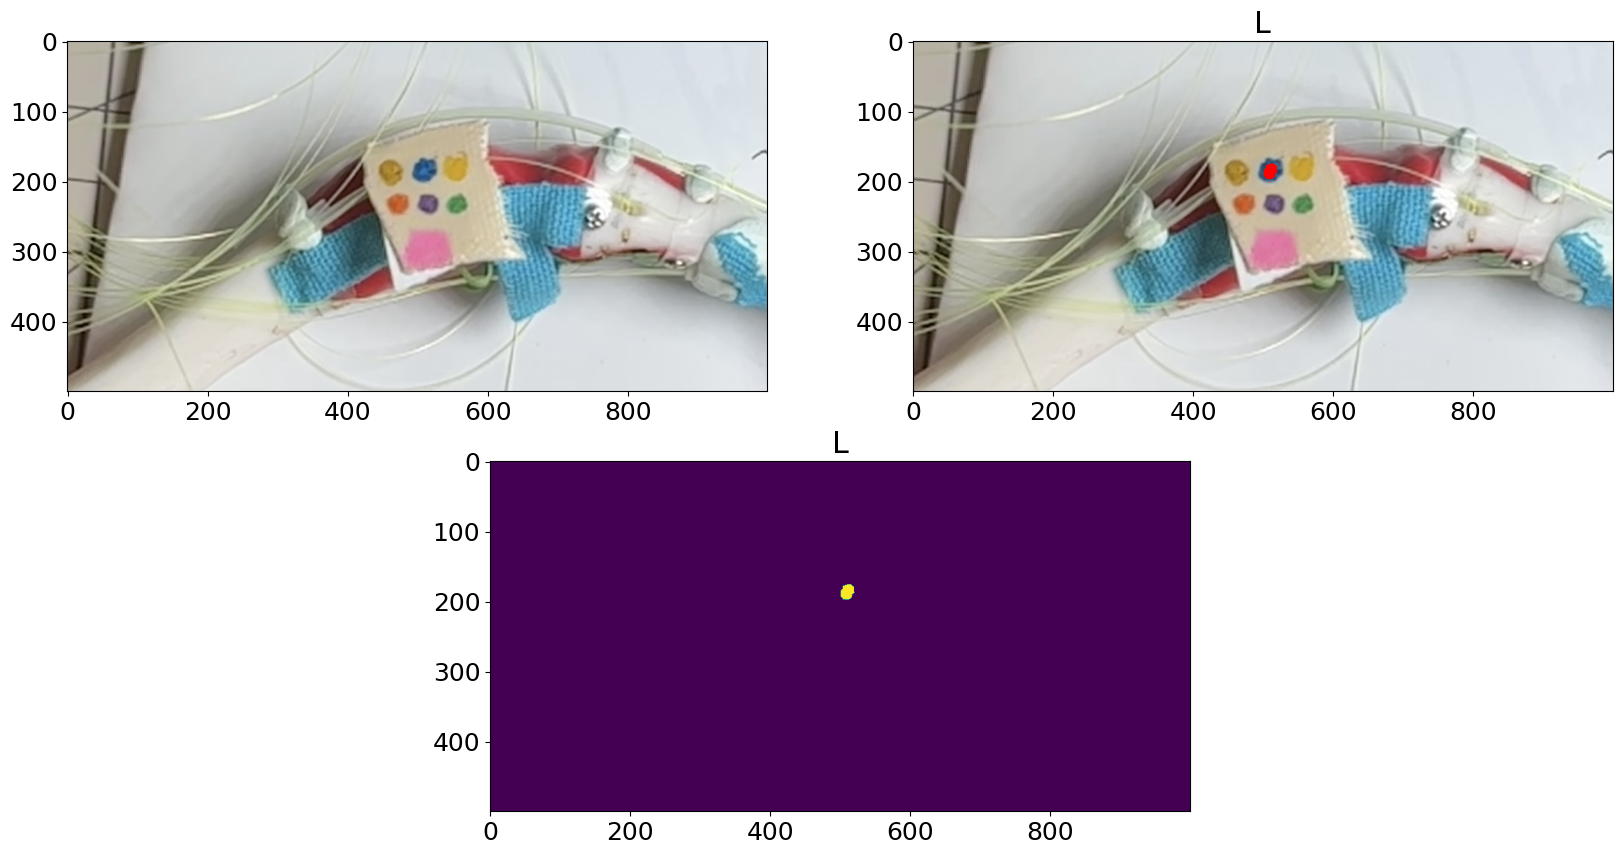

In [400]:
marker_blue = (frameLab[:, :, 1] > 110) & (frameLab[:, :, 2] < 100)
markup = frame.copy()
markup[marker_blue] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(frame)
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_blue)
plt.title('L')
#

Text(0.5, 1.0, 'L')

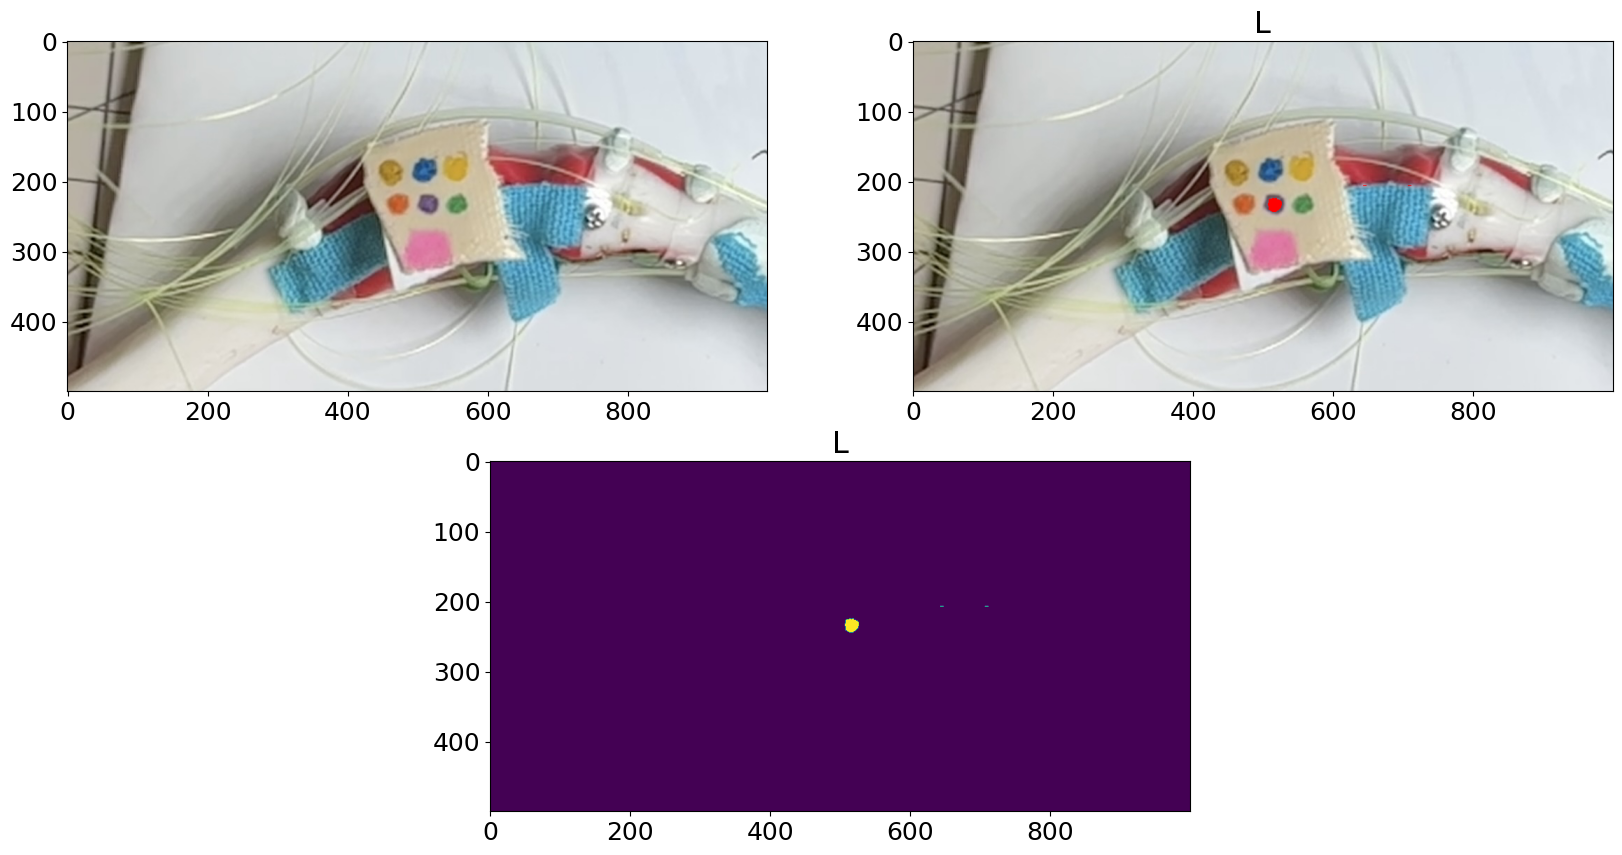

In [387]:
marker_purple = (frameLab[:, :, 1] > 135) & (frameLab[:, :, 1] < 160) & (frameLab[:, :, 2] < 120)
markup = frame.copy()
markup[marker_purple] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(frame)
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_purple)
plt.title('L')
#

Text(0.5, 1.0, 'L')

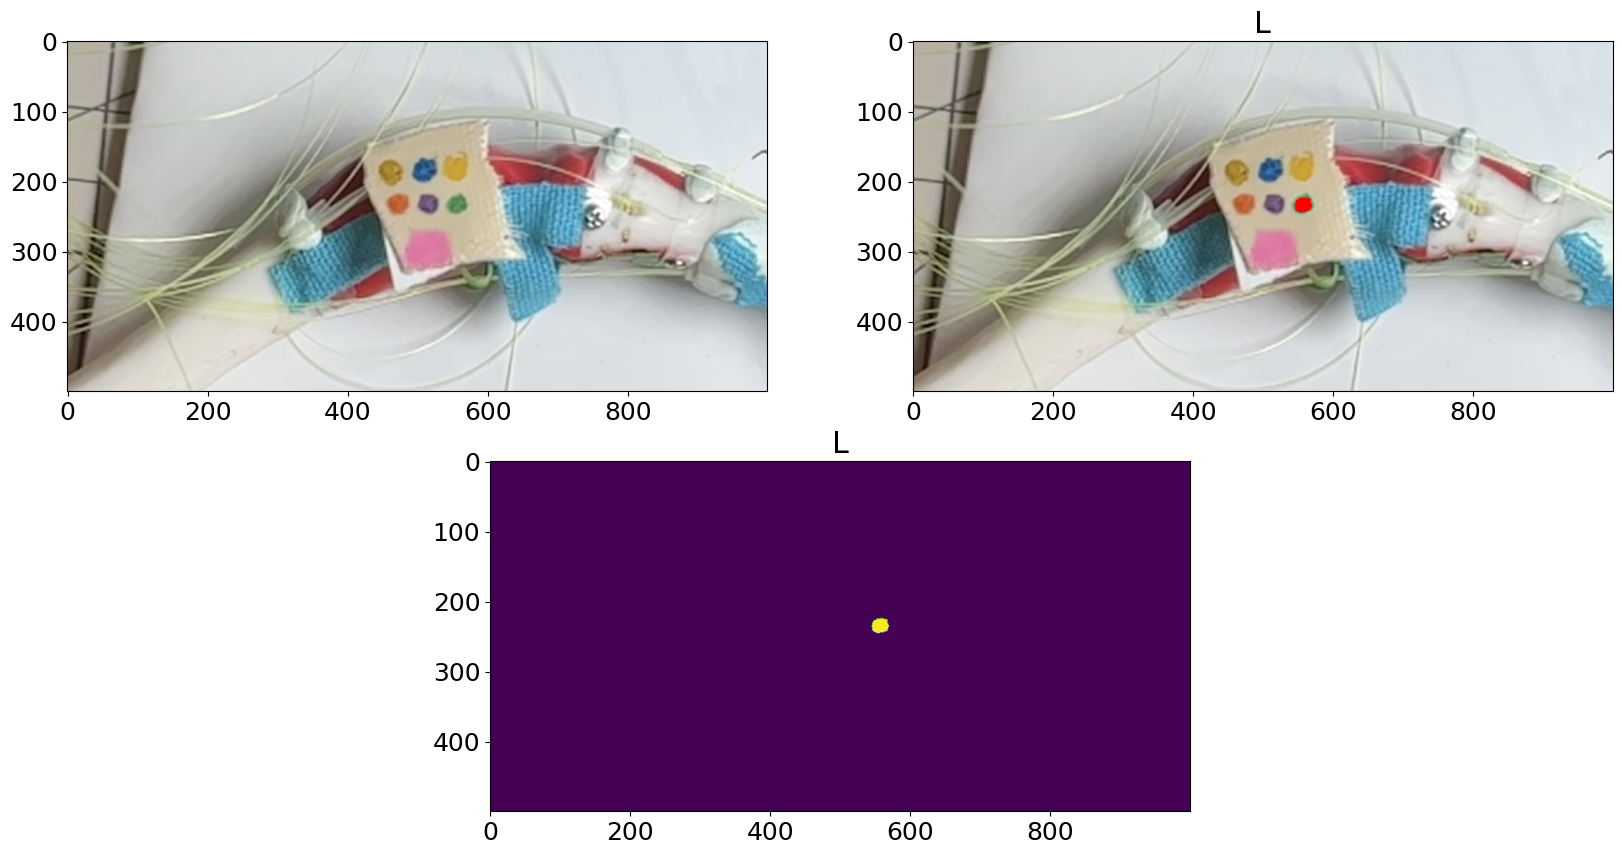

In [371]:
marker_green = (frameLab[:, :, 1] < 110) & (frameLab[:, :, 2] > 140)
markup = frame.copy()
markup[marker_green] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(frame)
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_green)
plt.title('L')
#

In [574]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
from skimage.morphology import dilation, disk

# Open the video file
cap = cv2.VideoCapture("../IMG_7102.MOV")
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a window to display the frames
cv2.namedWindow('Video Preview', cv2.WINDOW_NORMAL)
kernel = np.ones((5,5),np.uint8)
while True:
    ret, frame = cap.read()

    if not ret:
        break

    frameLab = cv2.cvtColor(frame, cv2.COLOR_BGR2Lab)

    stone_00 = (frameLab[:, :, 1] < 100) & (frameLab[:, :, 2] > 150)
    stone_01 = (frameLab[:, :, 1] < 115) & (frameLab[:, :, 2] < 130)
    stone_02 = (frameLab[:, :, 1] > 100) & (frameLab[:, :, 1] < 180) & (frameLab[:, :, 2] > 170)
    stone_03 = (frameLab[:, :, 1] > 140) & (frameLab[:, :, 1] < 145) & (frameLab[:, :, 2] < 130)
    stone_04 = (frameLab[:, :, 1] > 170) & (frameLab[:, :, 2] < 160)

    frame_combined = frame.copy()
    frame_combined[stone_00] = [0, 255, 0]
    frame_combined[stone_01] = [255, 0, 0]
    frame_combined[stone_02] = [0, 255, 255]
    frame_combined[stone_03] = [255, 0, 127]
    frame_combined[stone_04] = [0, 0, 255]

    stones = stone_00 + stone_01 + stone_02 + stone_03 + stone_04
    # stones = dilation(stones, disk(5))

    stones = cv2.dilate(stones.astype(np.uint8),kernel,iterations = 1)
    label_img = label(stones, connectivity=1.8)

    threshold_area_size = 300
    regions = regionprops(label_img)

    for region in regions:
        if region.area >= threshold_area_size:
            centroid = (int(region.centroid[1]), int(region.centroid[0]))
            frame_combined = cv2.circle(frame_combined, centroid, radius=10, color=(0, 0, 255), thickness=-1)

    cv2.imshow('Video Preview', frame_combined)

    if cv2.waitKey(int(1000 / fps)) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


[ WARN:0@78365.992] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@78365.992] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin41 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@78365.992] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@78365.992] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/open

KeyboardInterrupt: 

In [577]:
my_frame = frame.copy()
# my_frame = my_frame[270:750,400:1300]
frameLab = cv2.cvtColor(my_frame, cv2.COLOR_BGR2Lab)

Text(0.5, 1.0, 'b')

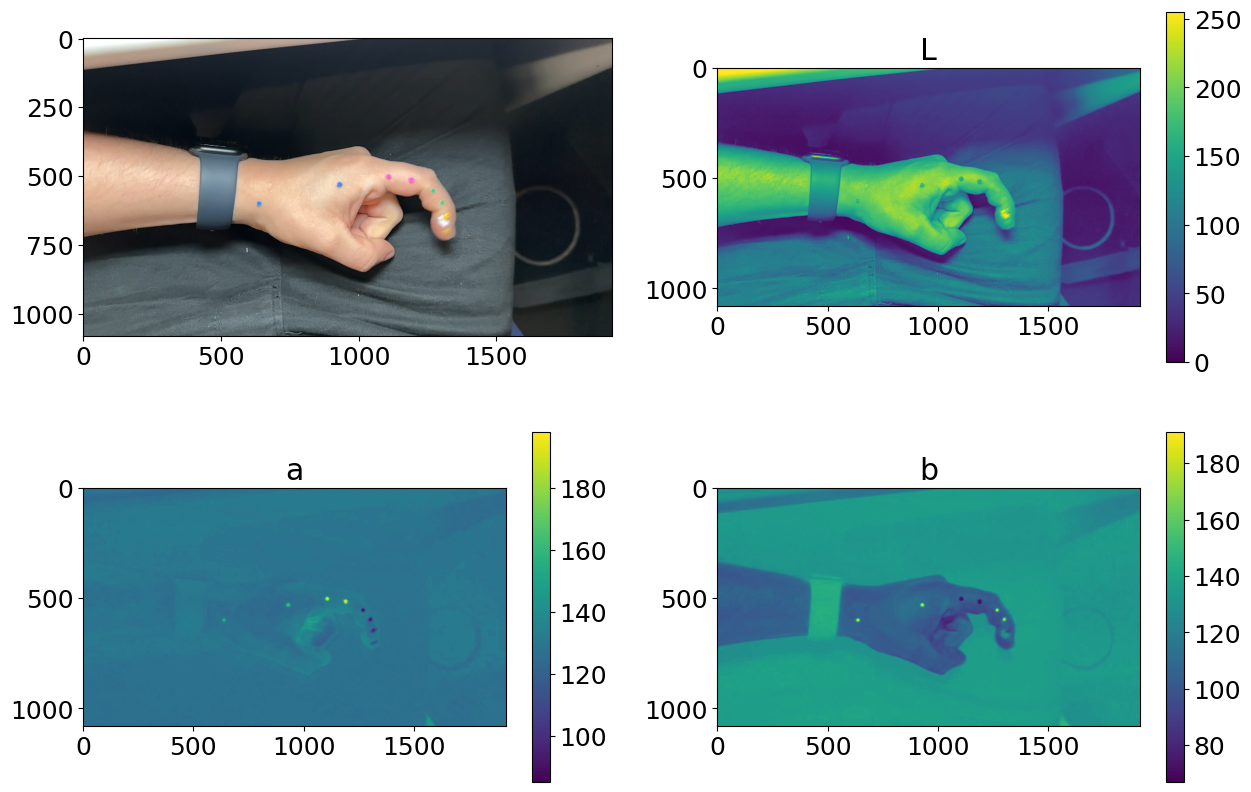

In [578]:
from skimage import color

# frame = img[500:1000,1000:2000,:]
frameLab = cv2.cvtColor(my_frame, cv2.COLOR_RGB2Lab)


plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(frameLab[:,:,0], cmap= 'viridis')
plt.colorbar()
plt.title('L')
plt.subplot(223)
plt.imshow(frameLab[:,:,1], cmap= 'viridis')
plt.colorbar()
plt.title('a')
plt.subplot(224)
plt.imshow(frameLab[:,:,2], cmap= 'viridis')
plt.colorbar()
plt.title('b')

Text(0.5, 1.0, 'L')

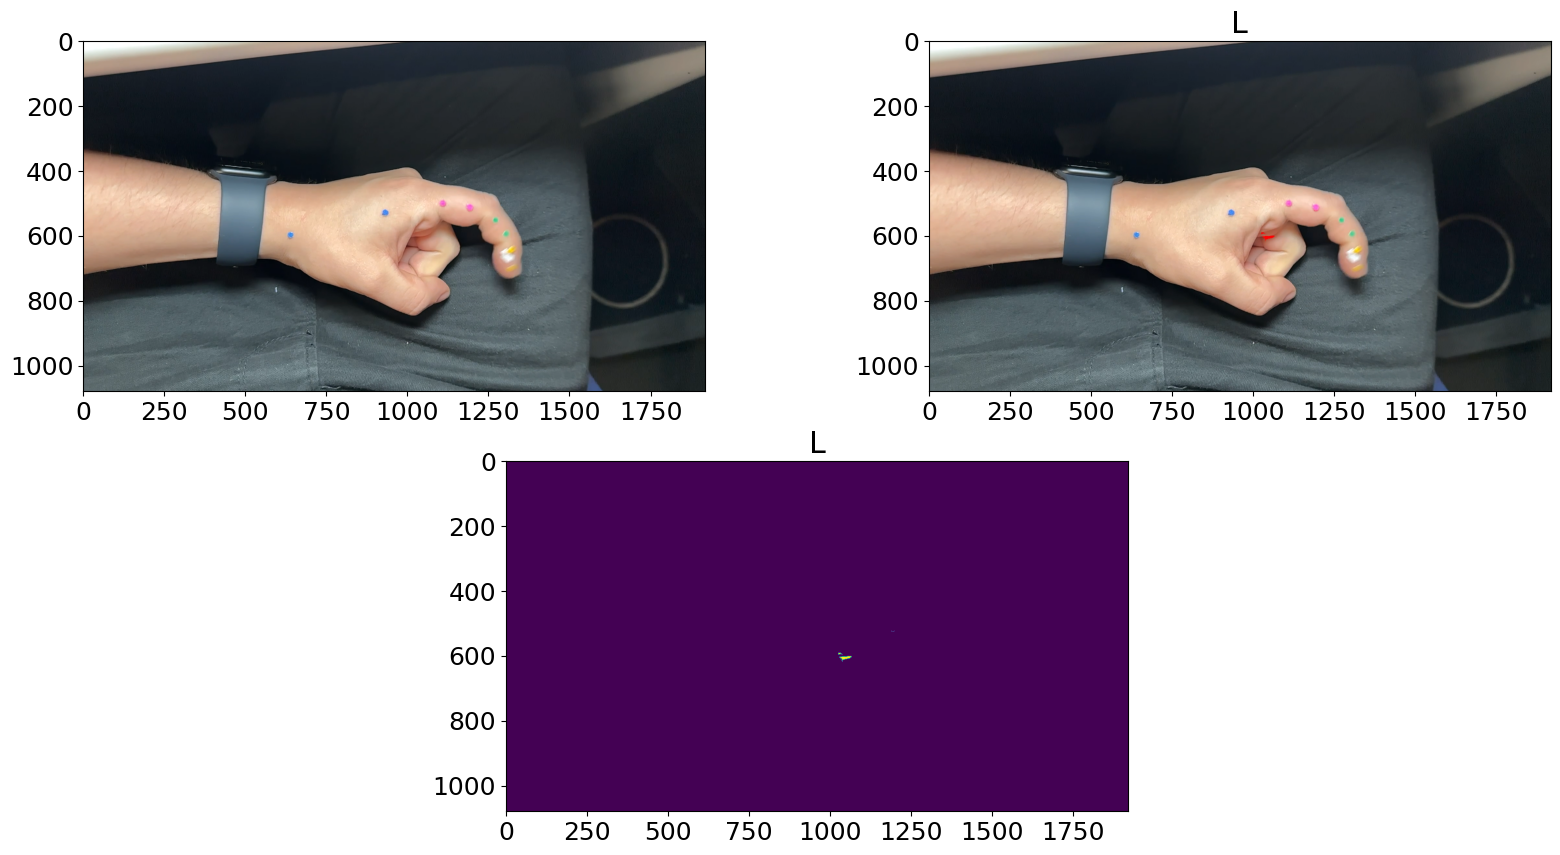

In [579]:
marker_orange = (frameLab[:, :, 1] > 135) & (frameLab[:, :, 1] < 160) & (frameLab[:, :, 2] < 80)
markup = cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB).copy()
markup[marker_orange] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_orange)
plt.title('L')
#

Text(0.5, 1.0, 'L')

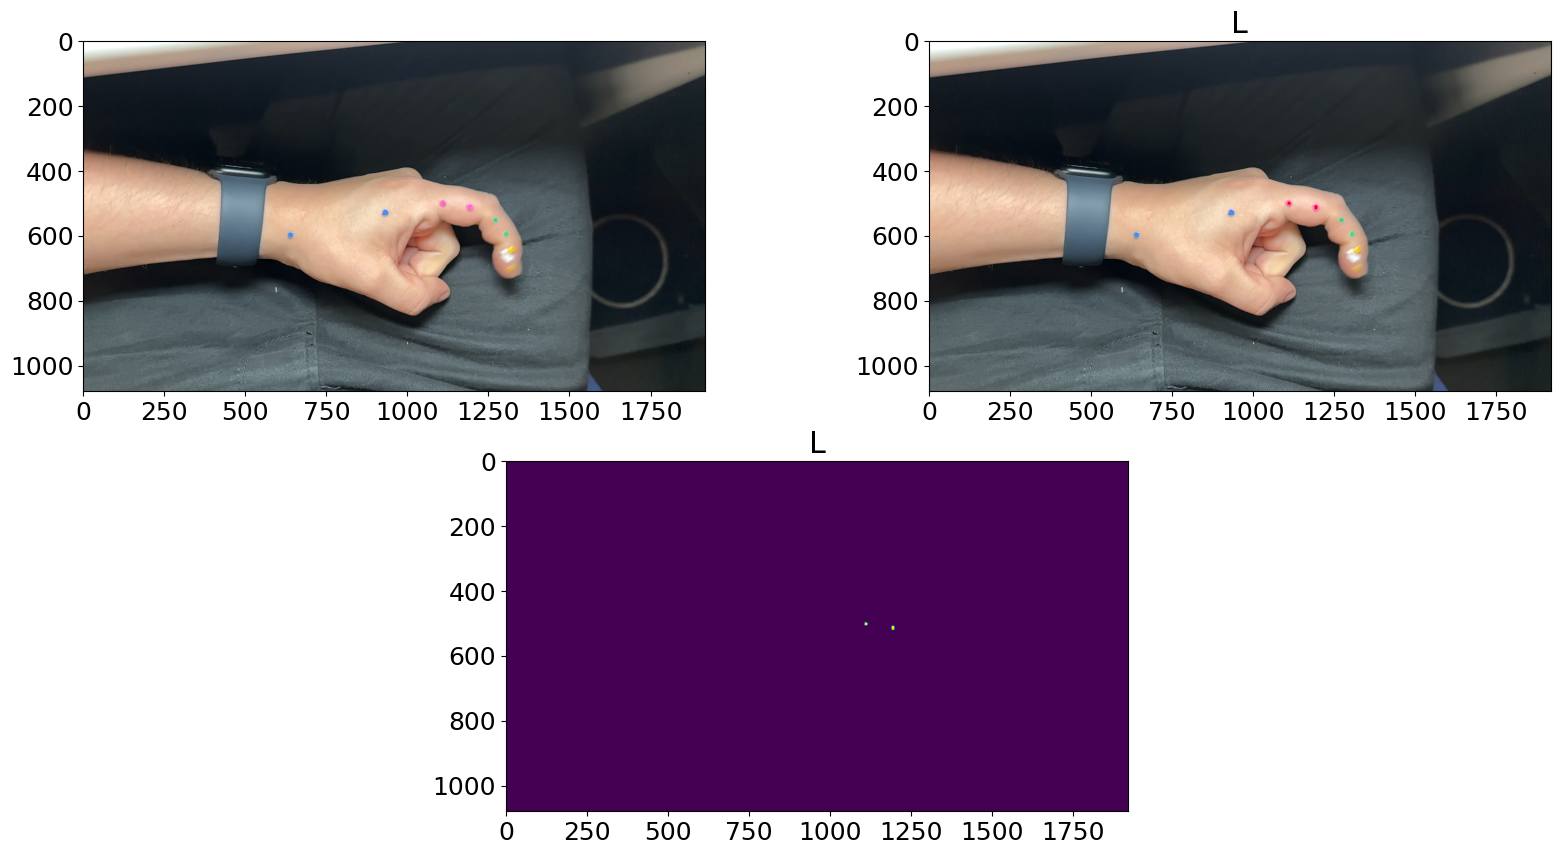

In [580]:
marker_pink = (frameLab[:, :, 1] > 185) & (frameLab[:, :, 2] < 75)
markup = cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB).copy()
markup[marker_pink] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_pink)
plt.title('L')
#

Text(0.5, 1.0, 'L')

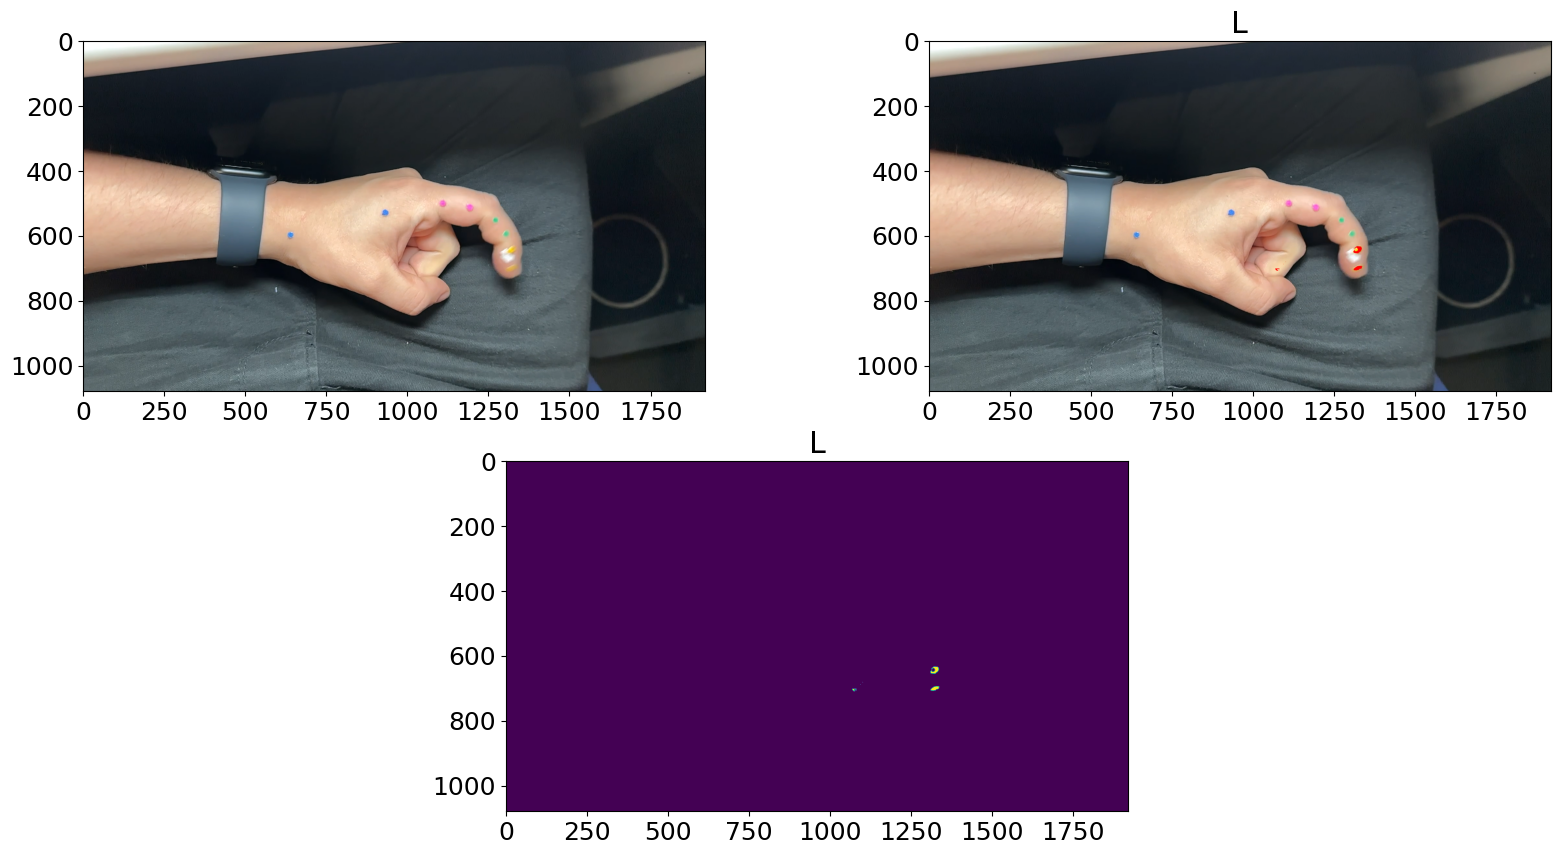

In [591]:
marker_yellow = (frameLab[:, :, 1] > 100) & (frameLab[:, :, 1] < 120) & (frameLab[:, :, 2] > 90) & (frameLab[:, :, 2] < 110)
markup = cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB).copy()
markup[marker_yellow] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_yellow)
plt.title('L')
#

Text(0.5, 1.0, 'L')

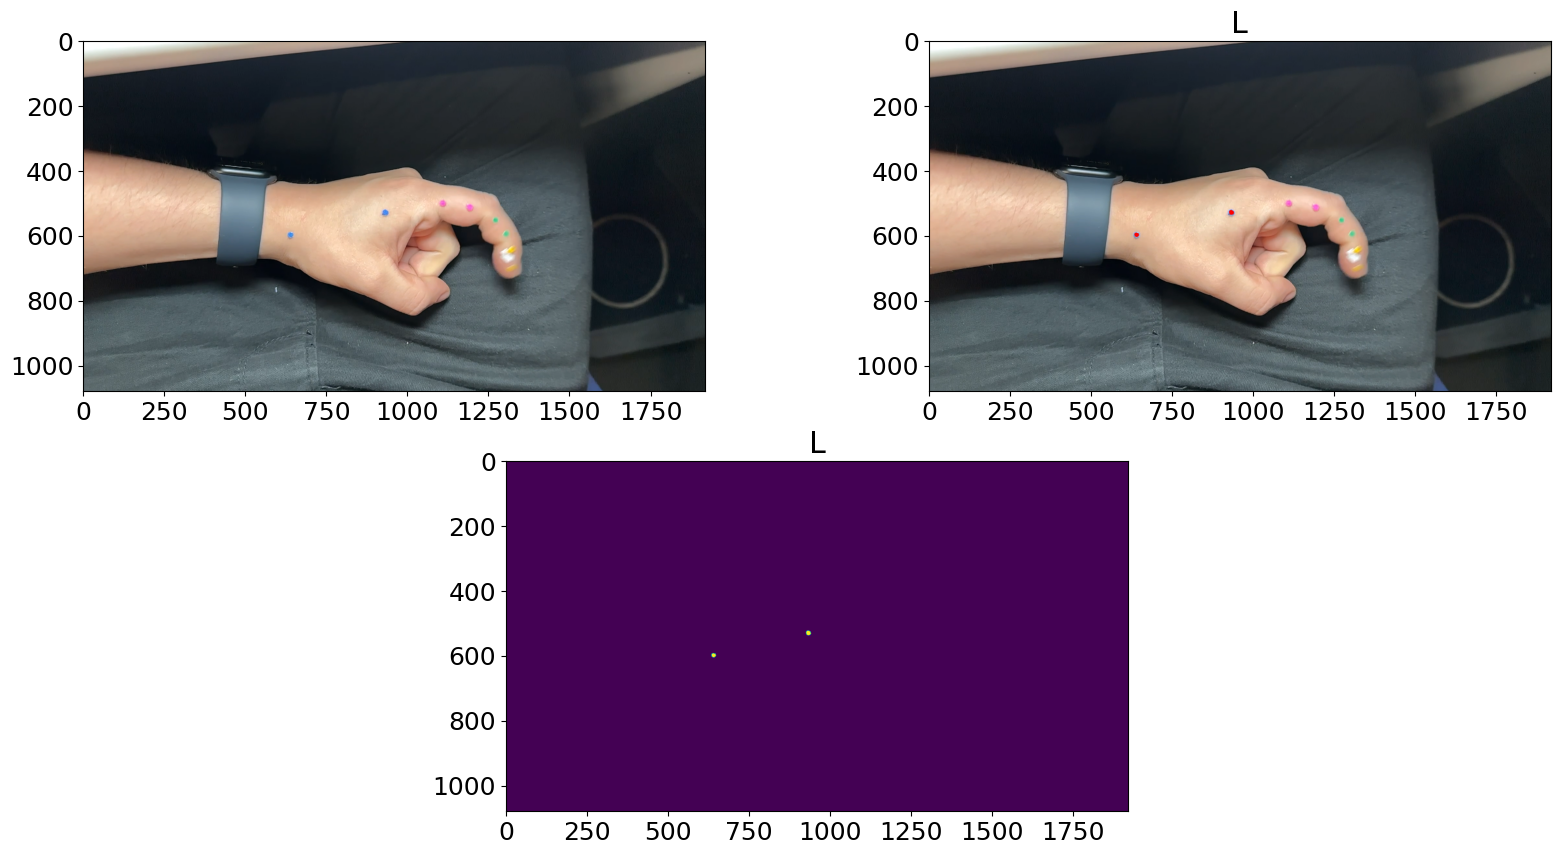

In [582]:
marker_blue = (frameLab[:, :, 1] > 140) & (frameLab[:, :, 1] < 170) & (frameLab[:, :, 2] > 160)
markup = cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB).copy()
markup[marker_blue] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_blue)
plt.title('L')
#

Number of cars: 3
Area index 2 | Area pixel size 304
Area index 3 | Area pixel size 267
Area index 4 | Area pixel size 295


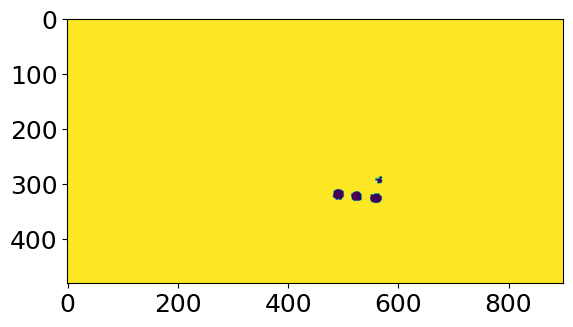

In [573]:
# Assuming label_img is your labeled image
tthreshold_area_size = 200
mask = np.uint8(marker_yellow.copy())

# Perform connected component analysis
num_labels, labels, stats, centroids = cv2.connectedComponentsWithStats(mask)

filtered_regions = [index for index, stat in enumerate(stats[1:]) if stat[4] >= tthreshold_area_size]
print(f"Number of cars: {len(filtered_regions)}")

# Iterate over each labeled region in the image
for index in filtered_regions:
    # Access region properties from the stats array
    left, top, width, height, area = stats[index + 1]

    # Print the area of the filtered region (for debugging or verification)
    print(f'Area index {index} | Area pixel size {area}')

    # Create a visualization of the centroid using a circle
    centroid_x, centroid_y = int(left + width / 2), int(top + height / 2)
    cv2.circle(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB).copy(), (centroid_x, centroid_y), radius=20, color=(0, 0, 255), thickness=2)

# Display the image with centroids
plt.imshow(labels==0)
plt.show()

In [547]:
np.unique(labels)

array([0, 1, 2, 3], dtype=int32)

In [548]:
stats

array([[     0,      0,    900,    480, 431375],
       [   318,    136,      1,      1,      1],
       [   396,    219,     18,     23,    327],
       [   354,    220,     18,     21,    297]], dtype=int32)

In [488]:
np.uint8(marker_blue)

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [449]:
# marker_purple = (frameLab[:, :, 1] > 130) & (frameLab[:, :, 1] < 160) & (frameLab[:, :, 2]) > 100 & (frameLab[:, :, 2] < 140)
# markup = cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB).copy()
# markup[marker_purple] = [255,0,0]
# plt.figure(figsize= (20, 10))
# plt.rcParams['font.size']=18
# plt.subplot(221)
# plt.imshow(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB))
# plt.subplot(222)
# plt.imshow(markup)
# plt.title('L')
# plt.subplot(212)
# plt.imshow(marker_purple)
# plt.title('L')
# #

Text(0.5, 1.0, 'L')

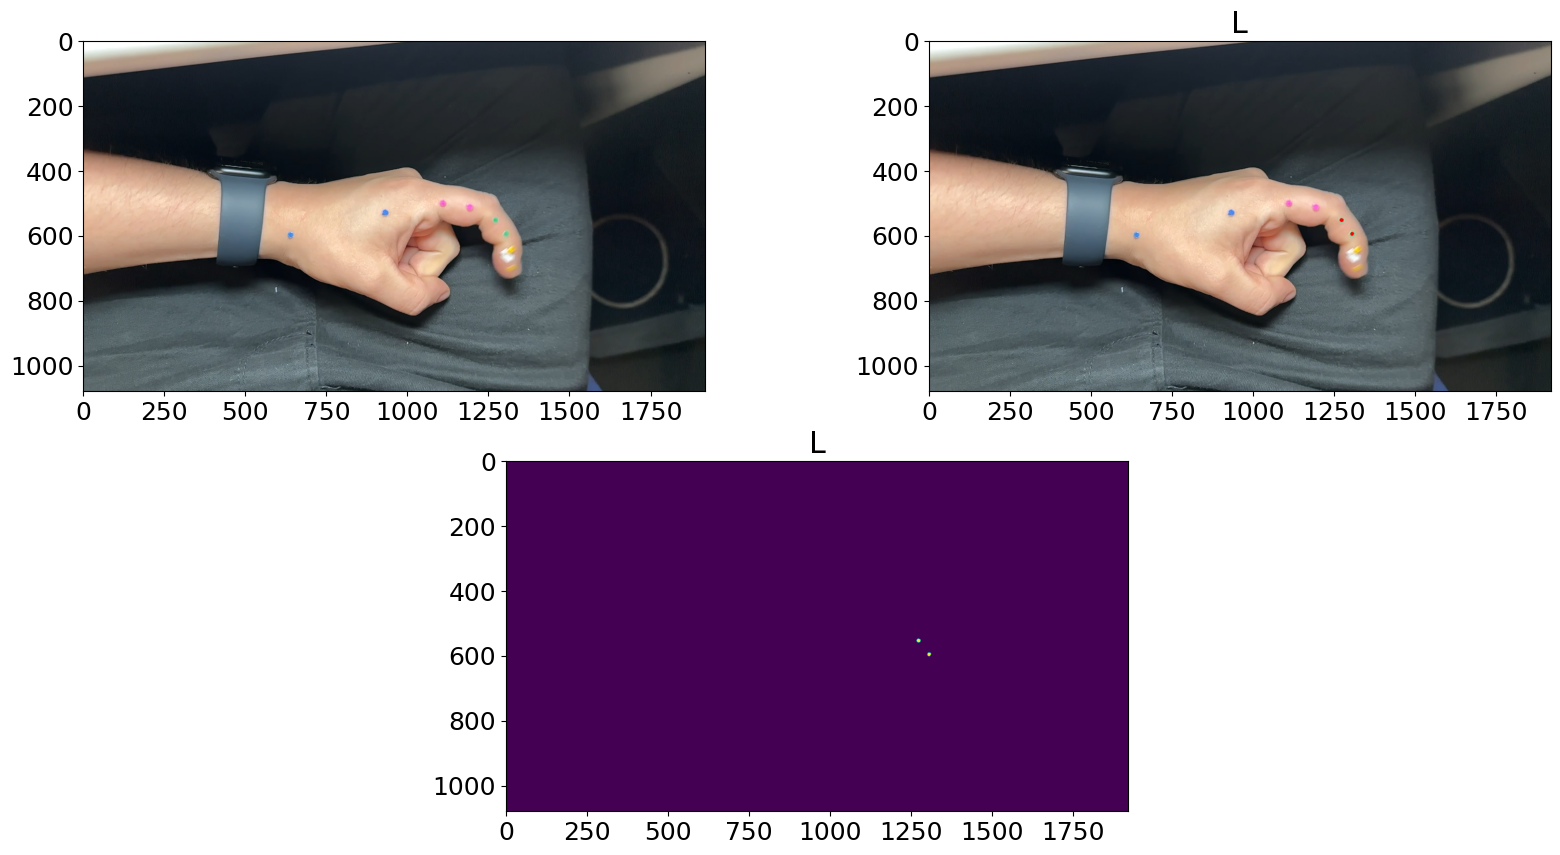

In [583]:
marker_green = (frameLab[:, :, 1] < 110) & (frameLab[:, :, 2] > 160)
markup = cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB).copy()
markup[marker_green] = [255,0,0]
plt.figure(figsize= (20, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(cv2.cvtColor(my_frame, cv2.COLOR_BGR2RGB))
plt.subplot(222)
plt.imshow(markup)
plt.title('L')
plt.subplot(212)
plt.imshow(marker_green)
plt.title('L')
#

In [34]:
# Uncomment and use one of the following lines to choose the video source:

# Use a pre-recorded video file (replace "_data/traffic.mp4" with the path to your video file)
cap = cv2.VideoCapture("../finder_with_stone.mov")

# Use the built-in camera (0 represents the default camera)
# cap = cv2.VideoCapture(0)

# If you're a Mac user with an iPhone, you might want to use the second camera (1 represents the second camera)
# cap = cv2.VideoCapture(1)

[ WARN:0@1232.432] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@1232.432] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin2 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@1232.432] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@1232.432] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-su

In [35]:
# Get the frame width of the video
frame_width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))

# Get the frame height of the video
frame_height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))

# Get the total number of frames in the video
length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Print the obtained video properties
print("Frame width:", frame_width)
print("Frame height:", frame_height)
print("Length (frames count):", length)
print("Frames per second:", fps)

Frame width: 1920
Frame height: 1080
Length (frames count): 1659
Frames per second: 164.24388122558594


In [36]:
# while cap.isOpened():
#     ret, frame = cap.read()
#     # If the frame is not read successfully, break the loop
#     if not ret:
#         break
#     cv2.rgbTo
#     plt.imshow(frame)
#     plt.draw()
#     display.clear_output(wait= True)
#     display.display(plt.gcf())
#     # time.sleep(.01)


In [319]:
frame_combined.shape

(1080, 1920, 3)

In [275]:
import cv2
import numpy as np
from skimage.measure import label, regionprops
from skimage.morphology import dilation, disk

# Open the video file
cap = cv2.VideoCapture("../finder_with_stone.mov")
if not cap.isOpened():
    print("Error: Could not open video file.")
    exit()

# Get the frames per second (fps) of the video
fps = cap.get(cv2.CAP_PROP_FPS)

# Create a window to display the frames
cv2.namedWindow('Video Preview', cv2.WINDOW_NORMAL)
kernel = np.ones((5,5),np.uint8)
while True:
    ret, frame = cap.read()

    if not ret:
        break

    frameLab = cv2.cvtColor(frame, cv2.COLOR_BGR2Lab)

    stone_00 = (frameLab[:, :, 1] < 100) & (frameLab[:, :, 2] > 150)
    stone_01 = (frameLab[:, :, 1] < 115) & (frameLab[:, :, 2] < 130)
    stone_02 = (frameLab[:, :, 1] > 100) & (frameLab[:, :, 1] < 180) & (frameLab[:, :, 2] > 170)
    stone_03 = (frameLab[:, :, 1] > 140) & (frameLab[:, :, 1] < 145) & (frameLab[:, :, 2] < 130)
    stone_04 = (frameLab[:, :, 1] > 170) & (frameLab[:, :, 2] < 160)

    frame_combined = frame.copy()
    frame_combined[stone_00] = [0, 255, 0]
    frame_combined[stone_01] = [255, 0, 0]
    frame_combined[stone_02] = [0, 255, 255]
    frame_combined[stone_03] = [255, 0, 127]
    frame_combined[stone_04] = [0, 0, 255]

    stones = stone_00 + stone_01 + stone_02 + stone_03 + stone_04
    # stones = dilation(stones, disk(5))

    stones = cv2.dilate(stones.astype(np.uint8),kernel,iterations = 1)
    label_img = label(stones, connectivity=1.8)

    threshold_area_size = 300
    regions = regionprops(label_img)

    for region in regions:
        if region.area >= threshold_area_size:
            centroid = (int(region.centroid[1]), int(region.centroid[0]))
            frame_combined = cv2.circle(frame_combined, centroid, radius=10, color=(0, 0, 255), thickness=-1)

    cv2.imshow('Video Preview', frame_combined)

    if cv2.waitKey(int(1000 / fps)) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()


[ WARN:0@8229.988] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2386) handleMessage OpenCV | GStreamer warning: your GStreamer installation is missing a required plugin
[ WARN:0@8229.988] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (2402) handleMessage OpenCV | GStreamer warning: Embedded video playback halted; module uridecodebin39 reported: Your GStreamer installation is missing a plug-in.
[ WARN:0@8229.989] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-suite_1664548333142/work/modules/videoio/src/cap_gstreamer.cpp (1356) open OpenCV | GStreamer warning: unable to start pipeline
[ WARN:0@8229.989] global /private/var/folders/nz/j6p8yfhx1mv_0grj5xl4650h0000gp/T/abs_562_cazh1h/croots/recipe/opencv-s

In [51]:
frame_orig

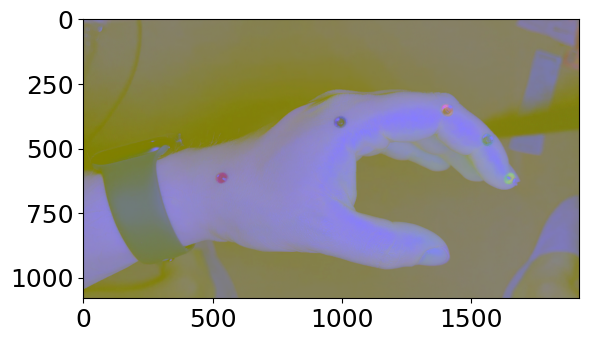

In [53]:
frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
plt.imshow(frame)

Text(0.5, 1.0, 'b')

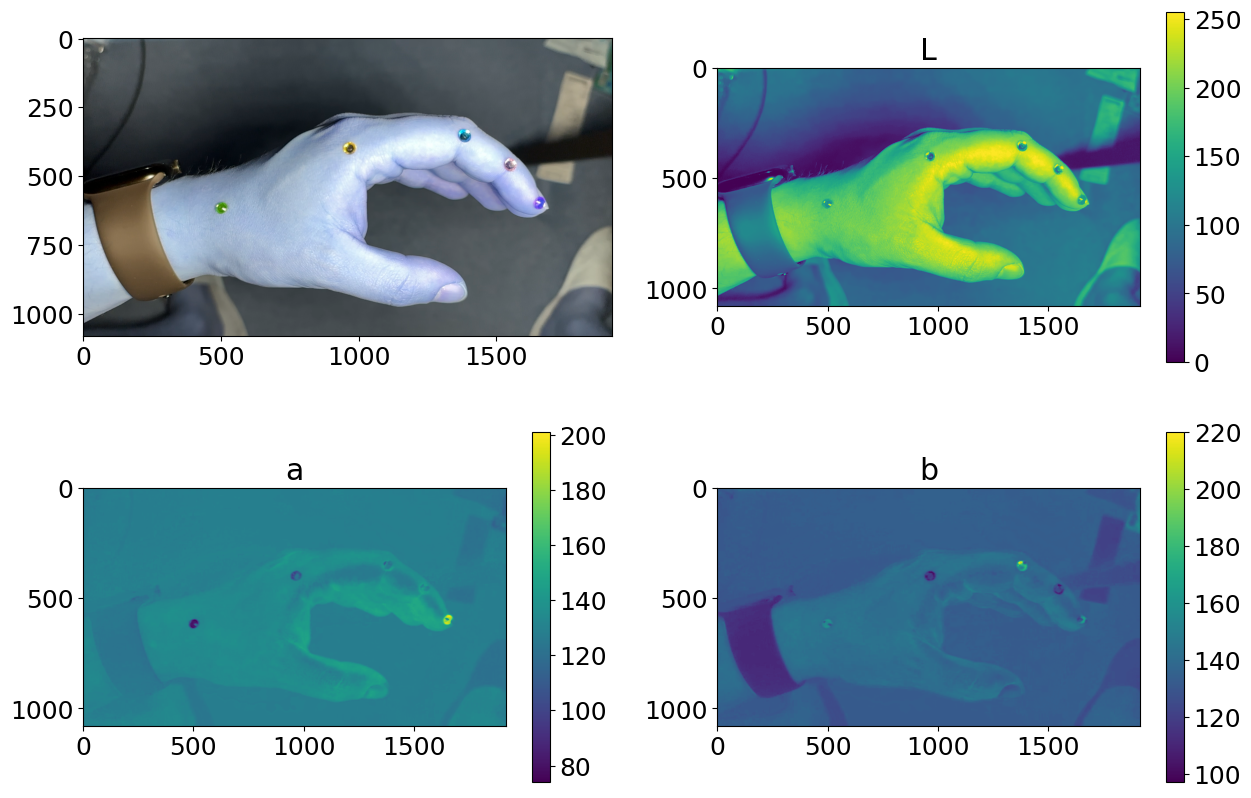

In [254]:
from skimage import color

# frameLab = cv2.cvtColor(frame_orig, cv2.COLOR_BGR2Lab)


plt.figure(figsize= (15, 10))
plt.rcParams['font.size']=18
plt.subplot(221)
plt.imshow(frame)
plt.subplot(222)
plt.imshow(frameLab[:,:,0], cmap= 'viridis')
plt.colorbar()
plt.title('L')
plt.subplot(223)
plt.imshow(frameLab[:,:,1], cmap= 'viridis')
plt.colorbar()
plt.title('a')
plt.subplot(224)
plt.imshow(frameLab[:,:,2], cmap= 'viridis')
plt.colorbar()
plt.title('b')

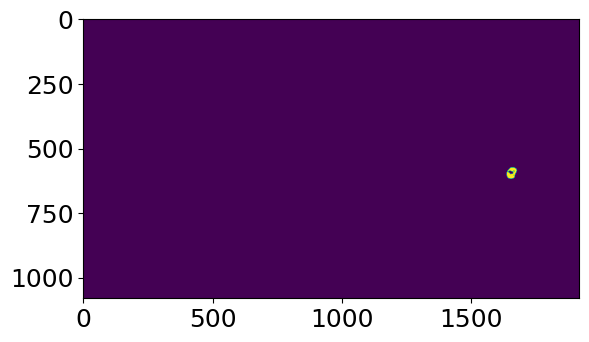

In [255]:
stone_04 = (frameLab[:,:,1] > 170) * (frameLab[:,:,2] < 170)
plt.imshow(stone_04)

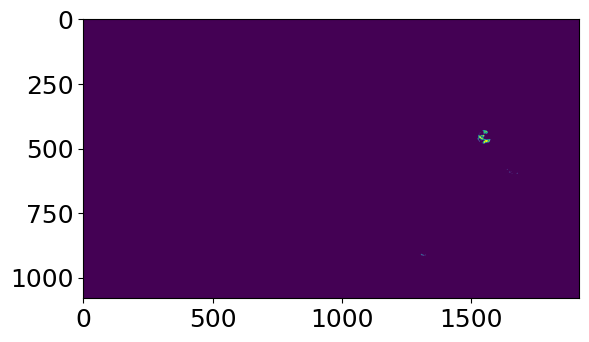

In [256]:
stone_03 = (frameLab[:,:,1] > 140) * (frameLab[:,:,1] < 145) * (frameLab[:,:,2] < 130)
plt.imshow(stone_03)



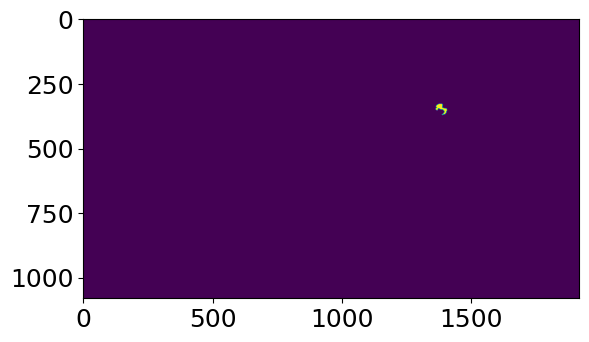

In [257]:
stone_02 = (frameLab[:,:,1] > 100) * (frameLab[:,:,1] < 180) * (frameLab[:,:,2] > 170)
plt.imshow(stone_02)

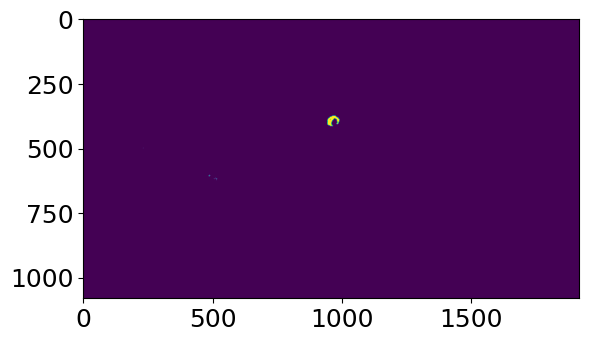

In [258]:
stone_01 = (frameLab[:,:,1] < 115) * (frameLab[:,:,2] < 130)
plt.imshow(stone_01)

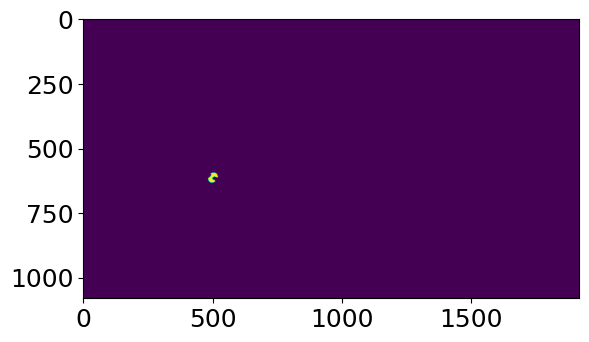

In [259]:
stone_00 = (frameLab[:,:,1] < 100) * (frameLab[:,:,2] > 150)
plt.imshow(stone_00)

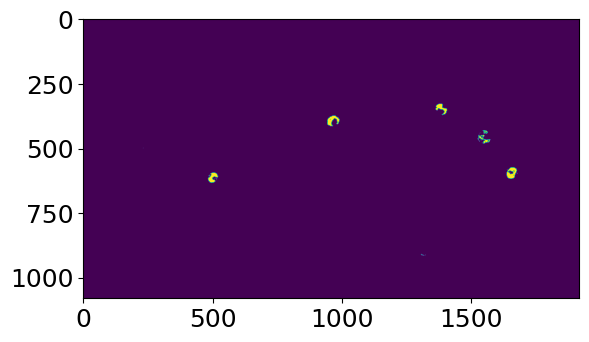

In [260]:
stones = stone_00 + stone_01 + stone_02 + stone_03 + stone_04
plt.imshow(stones)

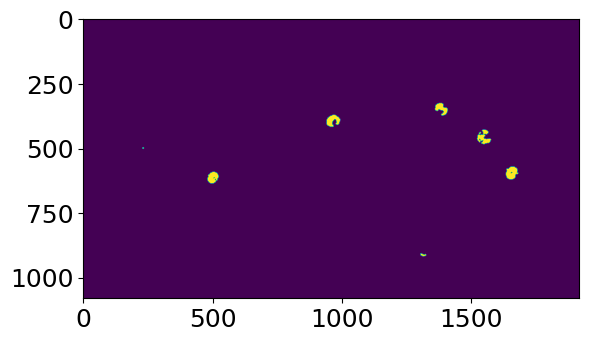

In [264]:
plt.imshow(morphology.dilation(stones, morphology.disk(3)))

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13]
Number of cars: 5
Area index 0 | Area pixel size 1148
Area index 3 | Area pixel size 797
Area index 4 | Area pixel size 636
Area index 5 | Area pixel size 1017
Area index 11 | Area pixel size 424


<Figure size 1500x1000 with 0 Axes>

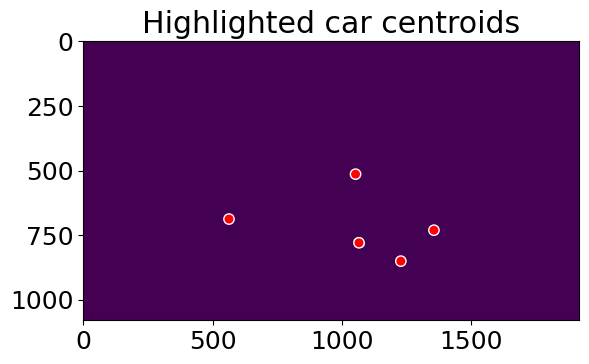

In [243]:
stones = stone_00 + stone_01 + stone_02 + stone_03 + stone_04
label_img = label(stones, connectivity=1)
print(np.unique(label_img))

# Set up the figure and axis for plotting
plt.figure(figsize=(15, 10))
fig, ax = plt.subplots(1)
ax.set_title("Highlighted car centroids")  # Set the title of the plot
ax.imshow(stone_04)  # Display the original image with cars

tthreshold_area_size = 100
# Get region properties for labeled objects in the image
regions = skimage.measure.regionprops(label_img)

filtered_regions = [region for region in regions if region.area >= tthreshold_area_size]
print(f"Number of cars: {len(filtered_regions)}")
# Iterate over each labeled region in the image
for index, region in enumerate(regions):
    # Filter regions based on area (number of pixels)
    if region.area >= tthreshold_area_size:
        # Print the area of the filtered region (for debugging or verification)
        print(f'Area index {index} | Area pixel size {region.area}')

        # Create a visualization of the centroid using a circle patch
        centroid_viz = patches.Circle((region.centroid[1], region.centroid[0]), radius=20, edgecolor='white', facecolor='red')

        # Add the centroid visualization to the plot
        ax.add_patch(centroid_viz)

# Show the matplotlib plot
plt.show()
# plt.imshow(regions)